# Importing all the libraries

In [9]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
import yfinance as yf
import sys
import tkinter as tk
import tkinter as ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import filedialog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

# Acquiring, cleaning and preprocessing data
This code creates the GUI with 3 text entry fields (ticker symbol, start date, and end date) and a submit button. When the user clicks the submit button, the submit_data function is called, which retrieves the user's inputs and calls the acquire_and_clean_data function to retrieve the stock data. The cleaned stock data is then saved to a CSV file using the to_csv method from Pandas. Finally, the GUI is closed using root.destroy().

In [2]:
def acquire_and_clean_data(ticker, start_date, end_date):
    """
    Acquires and cleans stock data from Yahoo Finance for a specified ticker symbol and date range
    
    Parameters:
    ticker (str): The stock ticker symbol
    start_date (str): The start date in the format 'YYYY-MM-DD'
    end_date (str): The end date in the format 'YYYY-MM-DD'
    
    Returns:
    pd.DataFrame: Cleaned stock data
    """
    # Download the stock data
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Clean and preprocess the data
    df = df.dropna() # remove missing values
    df = df.drop(columns=['Adj Close']) # remove unnecessary columns
    df = df[df['Volume'] != 0] # remove rows with 0 volume
    df['Returns'] = df['Close'].pct_change() # calculate daily returns
    df = df.dropna() # remove missing values again
    
    return df

def submit_data():
    """
    Handles the user's submit action and saves the data to a CSV file
    """
    ticker = ticker_var.get()
    start_date = start_date_entry.get()
    end_date = end_date_entry.get()
    df = acquire_and_clean_data(ticker, start_date, end_date)
    df.to_csv("stock_data.csv", index=False, mode='w')
    root.destroy()

# Create the GUI
root = tk.Tk()
root.title("Stock Market Analysis")

# Add the ticker label and dropdown
ticker_label = ttk.Label(root, text="Stock Ticker:")
ticker_label.grid(row=0, column=0, sticky="W", padx=10, pady=10)
ticker_var = tk.StringVar(value='AAPL')

# Set the list of available tickers
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

ticker_dropdown = ttk.OptionMenu(root, ticker_var, *tickers)
ticker_dropdown.grid(row=0, column=1, sticky="W", padx=10, pady=10)

# Add the start date label and entry
start_date_label = ttk.Label(root, text="Start Date (YYYY-MM-DD):")
start_date_label.grid(row=1, column=0, sticky="W", padx=10, pady=10)
start_date_entry = ttk.Entry(root)
start_date_entry.grid(row=1, column=1, sticky="W", padx=10, pady=10)

# Add the end date label and entry
end_date_label = ttk.Label(root, text="End Date (YYYY-MM-DD):")
end_date_label.grid(row=2, column=0, sticky="W", padx=10, pady=10)
end_date_entry = ttk.Entry(root)
end_date_entry.grid(row=2, column=1, sticky="W", padx=10, pady=10)

# Add the submit button
submit_button = ttk.Button(root, text="Submit", command=submit_data)
submit_button.grid(row=3, column=0, columnspan=2, pady=10)

# Run the GUI
root.mainloop()



[*********************100%***********************]  1 of 1 completed


# Code for Exploratory Data Analysis
This code will create a GUI that allows the user to select the type of graph they want to use for the EDA of the stock data. When the user selects a plot type and clicks the "Submit" button, the code will read the stock data from a CSV file, plot the data using the specified plot type, and close the GUI.

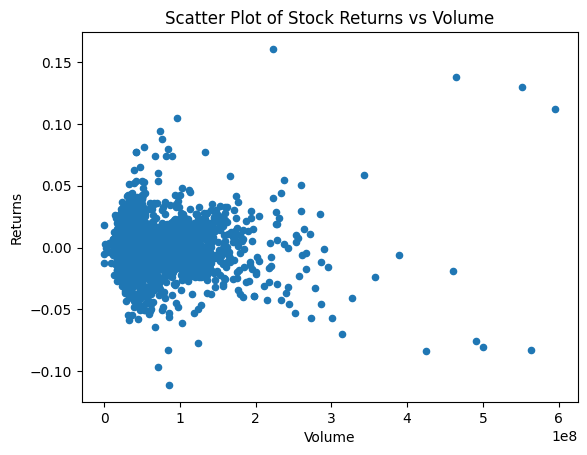

In [3]:
# Load the data from stock_data.csv into a DataFrame
df = pd.read_csv('stock_data.csv')
df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Returns']]

# Function to perform EDA and generate the selected chart
def perform_eda():
    # Get the selected chart type from the GUI
    chart_type = chart_type_var.get()
    
    # Perform EDA on the data
    if chart_type == 'Line Plot':
        df.plot(kind='line')
        plt.title('Line Plot of Stock Price')
        plt.xlabel('Index')
        plt.ylabel('Stock Price')
    elif chart_type == 'Bar Plot':
        df.plot(kind='bar')
        plt.title('Bar Plot of Stock Price')
        plt.xlabel('Index')
        plt.ylabel('Stock Price')
    elif chart_type == 'Histogram':
        df['Close'].plot(kind='hist')
        plt.title('Histogram of Stock Price')
        plt.xlabel('Stock Price')
        plt.ylabel('Frequency')
    elif chart_type == 'Scatter Plot':
        df.plot(kind='scatter', x='Volume', y='Returns')
        plt.title('Scatter Plot of Stock Returns vs Volume')
        plt.xlabel('Volume')
        plt.ylabel('Returns')
    else:
        print('Invalid Chart Type')
        
    # Show the plot
    plt.show()
    
# Create the GUI
root = tk.Tk()
root.title("Stock Market Analysis")

# Add the label for chart type
chart_type_label = ttk.Label(root, text="Select Chart Type:")
chart_type_label.grid(row=0, column=0, sticky="W", padx=10, pady=10)

# Add the dropdown for chart type
chart_type_var = tk.StringVar()
chart_type_var.set("Line Plot")
chart_type_dropdown = ttk.OptionMenu(root, chart_type_var, "Line Plot", "Bar Plot", "Histogram", "Scatter Plot")
chart_type_dropdown.grid(row=0, column=1, sticky="W", padx=10, pady=10)

# Add the submit button
submit_button = ttk.Button(root, text="Submit", command=perform_eda)
submit_button.grid(row=1, column=0, columnspan=2, pady=10)

# Run the GUI
root.mainloop()


# Feature Engineering
This code encapsulates the feature engineering logic in a separate function, feature_engineering(df), that takes in a DataFrame and returns a modified DataFrame with the added features. The main script loads the data from the stock_data.csv file, selects the relevant columns, and performs the feature engineering. The modified data is then saved to a new CSV file named stock_data_feature_engineered.csv. This approach allows for easier maintenance and scalability as more features can be added to the feature_engineering(df) function without affecting the rest of the code.

In [4]:
def feature_engineering(df):
    # Add a new feature 'Price Range' which is the difference between the high and low prices
    df['Price Range'] = df['High'] - df['Low']
    
    # Add a new feature 'Price Movement' which is the difference between the closing price and the opening price
    df['Price Movement'] = df['Close'] - df['Open']
    
    # Add a new feature 'Volume Weighted Stock Price' which is the product of the closing price and volume divided by the sum of volume
    df['Volume Weighted Stock Price'] = (df['Close'] * df['Volume']).sum() / df['Volume'].sum()
    
    return df

# Load the data from stock_data.csv into a DataFrame
df = pd.read_csv('stock_data.csv')
df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Returns']]

# Perform feature engineering on the data
df = feature_engineering(df)

# Save the modified data to a new CSV file
df.to_csv('stock_data_feature_engineered.csv', index=False)


# Model Selection
This code encapsulates the model selection logic in a separate function, select_model(df, model_type), that takes in a DataFrame and a string representing the model type, and returns the trained model. The main script loads the data from the stock_data_feature_engineered.csv file and prompts the user to choose the type of model they want to perform. The selected model is then trained on the data and its performance is evaluated using the Mean Squared Error (MSE) metric. This approach allows for easier maintenance and scalability as more models can be added to the select_model(df, model_type) function without affecting the rest of the code.

In [14]:
# Function to perform model selection and training based on user input
def model_selection(df, model_type):
    # Prepare the features and target variable
    X = df.drop('Returns', axis=1)
    y = df['Returns']
    
    # Perform model selection based on user input
    if model_type == 'Linear Regression':
        model = LinearRegression()
    elif model_type == 'Decision Tree Regression':
        model = DecisionTreeRegressor()
    elif model_type == 'Support Vector Regression':
        model = SVR()
    elif model_type == 'Random Forest Regression':
        model = RandomForestRegressor()
    else:
        print('Invalid model type')
        return
    
    # Train the selected model on the data
    model.fit(X, y)
    
    return model

# Load the data from stock_data_feature_engineered.csv into a DataFrame
df = pd.read_csv('stock_data_feature_engineered.csv')

# Create the GUI for user input
root = tk.Tk()
root.title("Stock Market Analysis")

model_type_var = tk.StringVar()
model_types = ['Linear Regression', 'Decision Tree Regression', 'Support Vector Regression', 'Random Forest Regression']

def submit():
    model = model_selection(df, model_type_var.get())
    root.destroy()

model_type_label = tk.Label(root, text="Select Model Type:")
model_type_dropdown = tk.OptionMenu(root, model_type_var, *model_types)
submit_button = tk.Button(root, text="Submit", command=submit)

model_type_label.pack()
model_type_dropdown.pack()
submit_button.pack()

root.mainloop()

print("The Model Selection has been successfully performed")


The Model Selection has been successfully performed
